In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from datetime import datetime
#sns.set_style('darkgrid', {'axes.facecolor': '.9'})
#sns.set_palette(palette='deep')
#sns_c = sns.color_palette(palette='deep')
%matplotlib inline

In [2]:
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')
#df=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/nyiso/nyiso_nyc_daily_all_features_selected.csv', parse_dates=['date'],date_parser=dateparse)
df1=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/caiso/la_daily_all_features_selected.csv', parse_dates=['date'],date_parser=dateparse)


In [3]:
df1.head()

,Unnamed: 0,date,total_load,daily_mean_temp,Restaurant_Recreaction,Grocery_Pharmacy,Retail,completely_home_device_count_percentage,median_home_dwell_time_percentage,part_time_work_behavior_devices_percentage,...,completely_home_device_count,device_count,part_time_work_behavior_devices,full_time_work_behavior_devices,accum_confirm,new_confirm,infect_rate,accum_death,new_death,fatal_rate
0,1,2019-01-01,66469.0,9.468750,204042,46877.0,331752.0,42.816267,51.944444,3.562546,...,248253.0,579809.0,20656,9125.0,0,0.0,0.0,0,0,0.0
1,2,2019-01-02,74406.0,9.537083,273913,82571.0,511654.0,40.147701,47.361111,8.227045,...,234253.0,583477.0,48003,27026.0,0,0.0,0.0,0,0,0.0
2,3,2019-01-03,74665.0,11.833333,289507,85116.0,534533.0,37.923107,47.986111,7.810609,...,221879.0,585075.0,45698,22748.0,0,0.0,0.0,0,0,0.0
3,4,2019-01-04,75629.0,12.400833,319713,90165.0,584087.0,36.561354,46.805556,7.533205,...,214436.0,586509.0,44183,20670.0,0,0.0,0.0,0,0,0.0
4,5,2019-01-05,71496.0,11.505833,278203,78243.0,496885.0,42.330590,51.944444,4.460419,...,254624.0,601512.0,26830,11053.0,0,0.0,0.0,0,0,0.0


In [17]:
df11=df1[['date','total_load']]

In [18]:
df11.head()

,date,total_load
0,2019-01-01,66469.0
1,2019-01-02,74406.0
2,2019-01-03,74665.0
3,2019-01-04,75629.0
4,2019-01-05,71496.0


In [19]:
df11['prediction']=df11['total_load']

D:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df11.head()

,date,total_load,prediction
0,2019-01-01,66469.0,66469.0
1,2019-01-02,74406.0,74406.0
2,2019-01-03,74665.0,74665.0
3,2019-01-04,75629.0,75629.0
4,2019-01-05,71496.0,71496.0


In [23]:
df11 = df11[(df11['date'] >= '2019-1-1') & (df11['date'] < '2021-3-16')]


In [24]:
df11.tail()

,date,total_load,prediction
800,2021-03-11,57144.00000,57144.00000
801,2021-03-12,58393.00000,58393.00000
802,2021-03-13,60454.00000,60454.00000
803,2021-03-14,61777.85714,61777.85714
804,2021-03-15,69200.00000,69200.00000


In [4]:
df2=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/caiso/test_data_covid_15day_forecast.csv', parse_dates=['date'])

In [5]:
df2.head()

,Unnamed: 0,date,total_load,daily_mean_temp,full_time_work_behavior_devices,completely_home_device_count,Restaurant_Recreaction,Retail,trans,prediction,diff
0,1,2021-03-16,69001,11.453750,18935,115561,127509,239860,367369,69959.405768,0.013890
1,2,2021-03-17,67706,12.592917,16379,103220,133573,246547,380120,68491.416716,0.011600
2,3,2021-03-18,62697,14.155417,16743,102857,134236,247254,381490,69447.726015,0.107672
3,4,2021-03-19,63689,15.203750,12857,94461,153095,275369,428464,65977.676253,0.035935
4,5,2021-03-20,64764,15.195833,9462,95236,160887,277518,438405,64071.660379,0.010690


In [9]:
df22=df2[['date','total_load','prediction']]

In [10]:
df22.head()

,date,total_load,prediction
0,2021-03-16,69001,69959.405768
1,2021-03-17,67706,68491.416716
2,2021-03-18,62697,69447.726015
3,2021-03-19,63689,65977.676253
4,2021-03-20,64764,64071.660379


In [25]:
df3=pd.concat([df11,df22],ignore_index=True)

In [26]:
df3.tail()

,date,total_load,prediction
832,2021-04-12,52995.0,59485.709040
833,2021-04-13,64491.0,60541.657742
834,2021-04-14,62160.0,61851.800224
835,2021-04-15,57652.0,57612.203540
836,2021-04-16,57657.0,65898.289002


[Text(0.5, 1.0, 'New York Daily Load')]

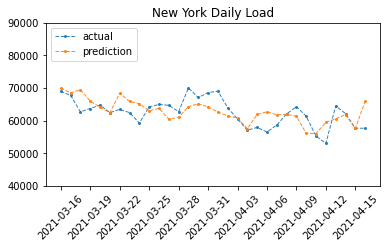

In [43]:
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(df3['date'], df3['total_load'],label='actual',lw=1,alpha=0.9,linestyle='dashed',marker='o',markersize=2)
ax.plot(df3['date'], df3['prediction'],label='prediction',lw=1,alpha=0.9,linestyle='dashed',marker='o',markersize=2)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
#ax.axvline(threshold_date, color=sns_c[3], linestyle='--', label='train test split')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_ylim(40000,90000)
ax.legend(loc='upper left')
ax.set(title='New York Daily Load')

In [ ]:
df4 = df3[(df3['date'] >= '2021-3-16') & (df3['date'] <= '2021-4-16')]


In [ ]:
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(df4['date'], df4['total_load'],label='actual',lw=1,alpha=0.9,linestyle='dashed',marker='o',markersize=2)
ax.plot(df4['date'], df4['prediction'],label='prediction',lw=1,alpha=0.9,linestyle='dashed',marker='o',markersize=2)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
#ax.axvline(threshold_date, color=sns_c[3], linestyle='--', label='train test split')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_ylim(40000,90000)
ax.legend(loc='upper left')
ax.set(title='New York Daily Load')